# Análise de Recursos Humanos

Este projeto tem por objetivo explorar dados relacionados à area de recursos humanos para melhor compreender o que leva à retenção ou não de um colaborador. O conjunto de dados fictício contém informações de idade, frequência de viagens, educação, distância do trabalho, horas de trabalho, anos na companhia e muitas outras informações e pode ser encontrado [neste link](https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors). O dicionário de dados completo pode ser encontrado abaixo.

* Age - Idade do colaborador. (Numérica)
* Attrition	- Se o colaborador saiu ou não da empresa. (Categórica)
* BusinessTravel - Frequência com que o colaborador viaja a trabalho. (Categórica)
* DailyRate	- Taxa diária de pagamento ao colaborador. (Numérica)
* Department - O departamento em que o colaborador trabalha. (Categórica)
* DistanceFromHome - A distância em milhas da casa do colaborador para a empresa. (Numérica)
* Education - Nível de educação do colaborador. (Categórica - Encoding numérico traduzido durante a análise)
* EducationField - Área de estudo da educação do colaborador. (Categórica)
* EmployeeCount	- Linha redundante, tem valor 1 para todos os registros.
* EmployeeNumber - Identificador único para o perfil do colaborador. (ID)
* EnvironmentSatisfaction - Satisfação do colaborador com o ambiente de trabalho. (Categórica)
* Gender - Gênero do colaborador. (Categórica)
* HourlyRate - Taxa por hora de pagamento ao colaborador. (Numérica)
* JobInvolvement - O nível de envolvimento requerido para o trabalho do colaborador. (Categórica)
* JobLevel - O nível do trabalho do colaborador. (Categórica)
* JobRole - A função do colaborador na organização. (Categórica)
* JobSatisfaction - Nível de satisfação do colaborador com seu trabalho. (Categórica)
* MaritalStatus - Estado civil do colaborador. (Categórica)
* MonthlyIncome - Renda mensal do colaborador. (Numérica)
* MonthlyRate - Remuneração mensal do colaborador. (Numérica)
* NumCompaniesWorked - Número de empresas em que o colaborador trabalhou. (Numérica)
* Over18 - Se o colaborador tem mais de 18 anos. (Categórica)
* OverTime - Se o colaborador trabalha horas extras ou não. (Categórica)
* PercentSalaryHike	- A porcentagem de aumento salarial para o colaborador. (Numérica)
* PerformanceRating - Avaliação de desempenho do colaborador. (Categórica)
* RelationshipSatisfaction - A satisfação do colaborador com seus relacionamentos. (Categórica)
* StandardHours - As horas padrão de trabalho para o colaborador. (Numérica)
* StockOptionLevel - Nível de opção de ação para o colaborador. (Numérica)
* TotalWorkingYears - Total de anos trabalhando do colaborador. (Numérica)
* TrainingTimesLastYear - Número de treinamentos que o colaborador recebeu no último ano. (Numérica)
* WorkLifeBalance - A percepção do colaborador do seu equilíbrio entre vida e trabalho. (Categórica)
* YearsAtCompany - Número de anos do colaborador na empresa. (Numérica)
* YearsInCurrentRole - Número de anos do colaborador no seu cargo atual. (Numérica)
* YearsSinceLastPromotion - The number of years since the employee's last promotion. (Numérica)
* YearsWithCurrManager - Número de anos do colaborador com seu gerente atual. (Numérica)

# Importando os dados e bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


filterwarnings('ignore')
colors = ['royalblue','midnightblue']

In [2]:
data = pd.read_csv("HR_Analytics.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Análise Univariada

Primeiro vamos explorar a distribuição dos colaboradores por variável única.

## Qual a distribuição de gênero dos colaboradores?

In [3]:
genero, count = data.Gender.value_counts().index, data.Gender.value_counts().values

In [4]:
def my_format(x):
    return f"{total*x/100:.0f}\n{x: .0f}%"

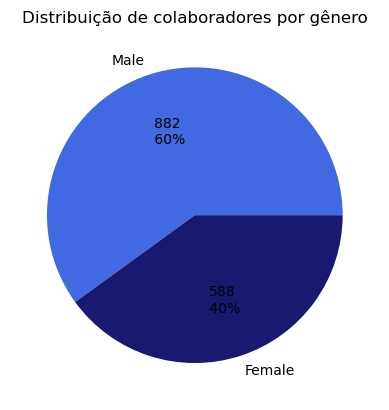

In [5]:
total = sum(count)
pie = plt.pie(count, labels = genero, autopct = my_format, colors = colors)
plt.title('Distribuição de colaboradores por gênero');

## Qual a distribuição dos colaboradores por idade?

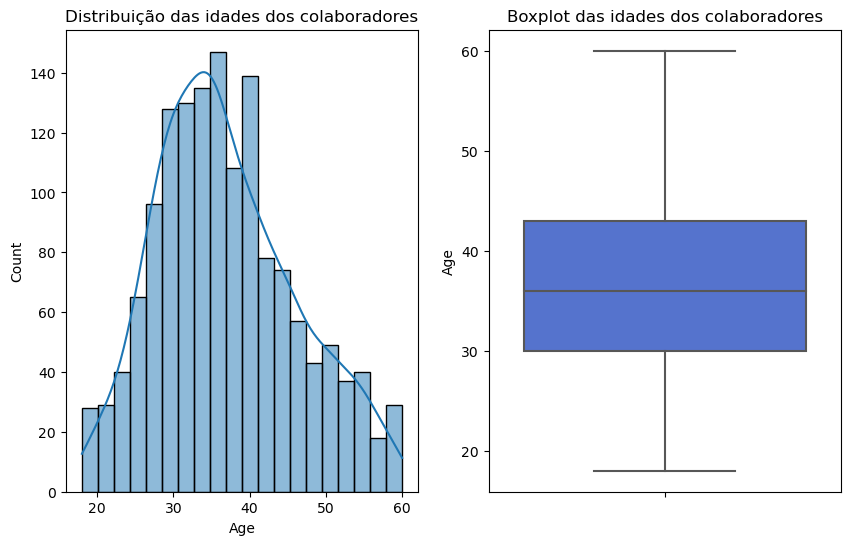

In [6]:
plt.figure(figsize= (10,6))

plt.subplot(1, 2, 1)
sns.histplot(data = data['Age'], bins = 20, palette = colors, kde = True)
plt.title('Distribuição das idades dos colaboradores')

plt.subplot(1,2,2)
sns.boxplot(data = data, y = 'Age', palette = colors)
plt.title('Boxplot das idades dos colaboradores');

In [7]:
data.Age.mean(), data.Age.median()

(36.923809523809524, 36.0)

Vê-se a idade dos colaboradores está entre 18 e 60 anos, com uma maior concentração entre os 30 e 40 anos. A distribuição é bastante simétrica, com uma média e mediana bem próximas a 36 anos.

## Qual a distribuição de tempo na empresa entre os colaboradores?

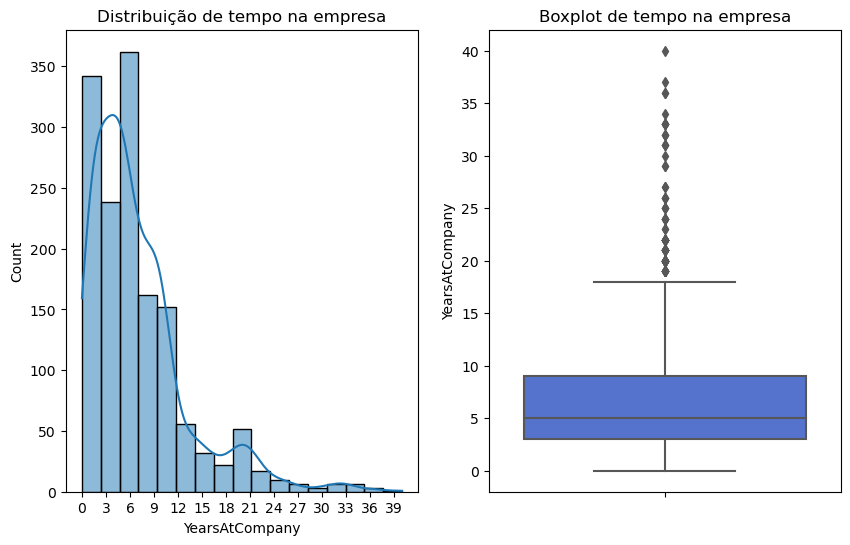

In [8]:
plt.figure(figsize= (10,6))

plt.subplot(1, 2, 1)
sns.histplot(data = data['YearsAtCompany'], bins = 17, palette = colors, kde = True)
plt.xticks(range(0,40,3))
plt.title('Distribuição de tempo na empresa')

plt.subplot(1,2,2)
sns.boxplot(data = data, y = 'YearsAtCompany', palette = colors)
plt.title('Boxplot de tempo na empresa');

In [9]:
data.YearsAtCompany.mean(), data.YearsAtCompany.median()

(7.0081632653061225, 5.0)

Pelo histograma, vê-se que existe uma distribuição **bimodal**, com muitos funcionários com até 3 anos anos na empresa, mas também muitos entre 5 a 8 anos, sendo a média de 7 anos. Além disso, há muitos funcionários _outliers_, com mais de 20 anos na empresa.

## Qual a distribuição dos colaboradores por departamento?

In [10]:
dist_departamento = data.Department.value_counts()

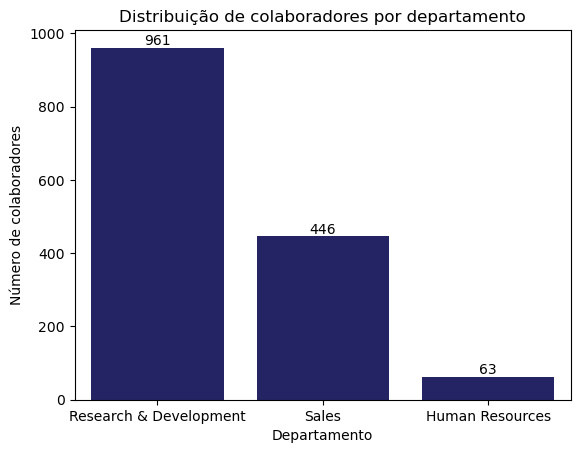

In [11]:
sns.countplot(data = data, x = 'Department', color= colors[1], order = data.Department.value_counts().index)
plt.title('Distribuição de colaboradores por departamento')
plt.ylabel('Número de colaboradores')
plt.xlabel('Departamento')

# Adicionando labels ao topo das barras
for i, count in enumerate(pd.value_counts(data.Department)):
    plt.annotate(str(count), xy=(i, count), ha = 'center', va = 'bottom')

A maioria dos colaboradores trabalha no departamento de Research & Development, enquanto menos da metade trabalha em Sales (Vendas) e alguns poucos são dos Recursos Humanos.

## Qual a distribuição de nível e área de educação?

In [12]:
education_map = {
    1: 'Sem Graduação',
    2: 'Cursando Graduação',
    3: 'Graduação',
    4: 'Mestrado',
    5: 'Doutorado'}

data['EducationLevel'] = data['Education'].map(education_map)

data['EducationLevel'].value_counts()

Graduação             572
Mestrado              398
Cursando Graduação    282
Sem Graduação         170
Doutorado              48
Name: EducationLevel, dtype: int64

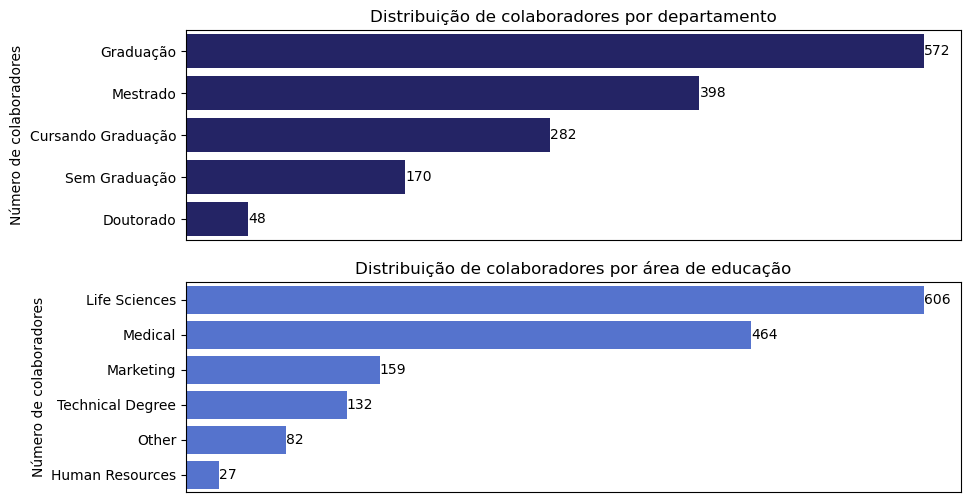

In [13]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
sns.countplot(data = data, y = 'EducationLevel', color= colors[1], order = data.EducationLevel.value_counts().index)
plt.title('Distribuição de colaboradores por departamento')
plt.ylabel('Número de colaboradores')
plt.xlabel(None)
plt.xticks([])

# Adicionando labels ao topo das barras
for i, count in enumerate(pd.value_counts(data.EducationLevel)):
    plt.annotate(str(count), xy=(count, i), ha = 'left', va = 'center')
    
plt.subplot(2,1,2)
sns.countplot(data = data, y = 'EducationField', color= colors[0], order = data.EducationField.value_counts().index)
plt.title('Distribuição de colaboradores por área de educação')
plt.ylabel('Número de colaboradores')
plt.xlabel(None)
plt.xticks([])

for i, count in enumerate(pd.value_counts(data.EducationField)):
    plt.annotate(str(count), xy=(count, i), ha = 'left', va = 'center')

Graduação é o nível de educação mais comum entre os funcionários, mas a empresa possui um número expressivo de funcionários com Mestrado e também cursando graduação. Considerando que a maior parte das operações da empresa é na área de Pesquisa e Desenvolvimento, faz sentido que muitos funcionários estejam atualmente na faculdade, como alunos pesquisadores.

Já quanto a área de que vieram os colaboradores, a sua maioria vem de Ciências da Natureza e Medicina, mas também há 159 funcionários com background em Marketing.

## Como é a distribuição de treinamentos na empresa?

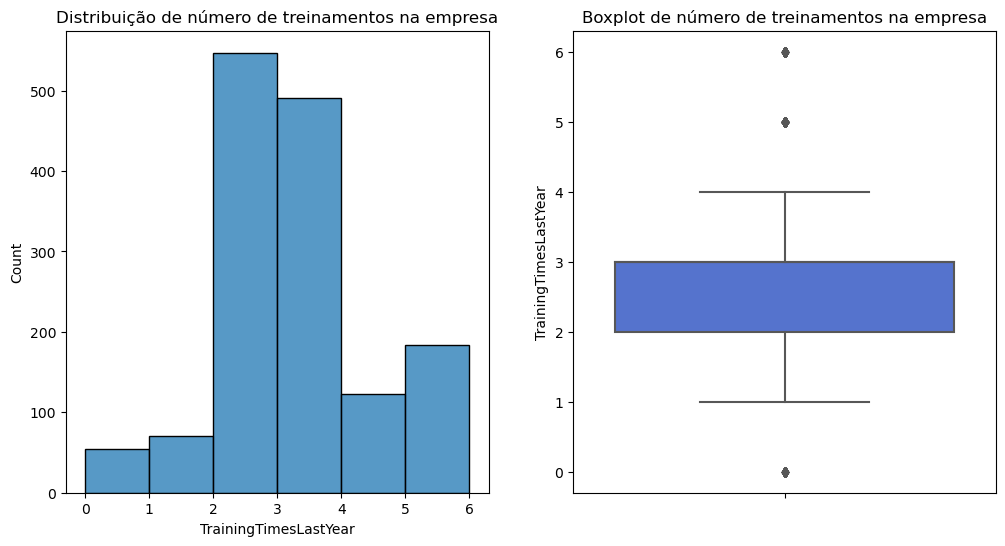

In [14]:
plt.figure(figsize= (12,6))

plt.subplot(1, 2, 1)
sns.histplot(data = data['TrainingTimesLastYear'], bins = 6, palette = colors, kde = False)
plt.title('Distribuição de número de treinamentos na empresa')

plt.subplot(1,2,2)
sns.boxplot(data = data, y = 'TrainingTimesLastYear', palette = colors)
plt.title('Boxplot de número de treinamentos na empresa');

A maior parte dos colaboradores recebeu entre 2 e 3 treinamentos no ano passado. Porém existem alguns _outliers_ que não receberam nenhum treinamento, ou que receberam 5 ou 6 treinamentos.

## Análise Bivariada

Nesta etapa, vamos analisar os padrões no conjunto de dado de acordo com mais de uma variável. Uma variável muito importante no dataset é a _Attrition_, que indica se o funcionário saiu ou não da empresa. Vamos avaliar seu comportamento em relação a outras variáveis.

## A frequência de viagens a trabalho influencia na retenção dos colaboradores da empresa?

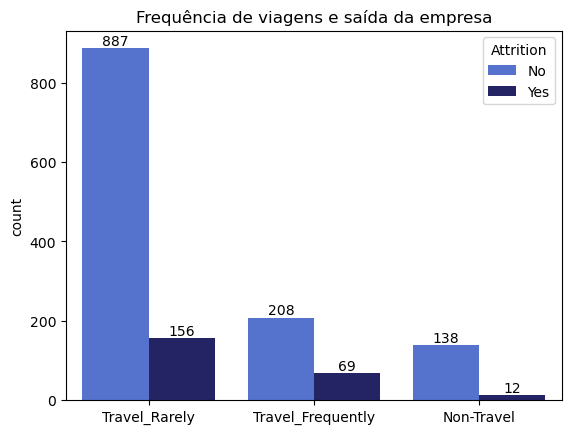

In [15]:
ax = sns.countplot(data = data, x = 'BusinessTravel', hue = 'Attrition', palette = colors, hue_order = ['No', 'Yes'], 
                   order = data['BusinessTravel'].value_counts().index)
plt.title('Frequência de viagens e saída da empresa')
plt.xlabel(None);

for p in ax.patches:
    count = p.get_height()
    ax.annotate(str(int(count)), xy=(p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

Como a distribuição dos valores tem escalas bastante diferentes, vamos visualizar os dados em forma de percentual:

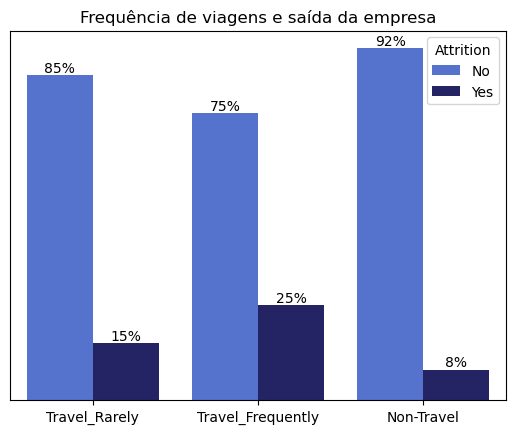

In [16]:
normalized_counts = data.groupby('BusinessTravel')['Attrition'].value_counts(normalize = True).rename('Proportion').reset_index()
normalized_counts

ax = sns.barplot(data=normalized_counts, x='BusinessTravel', y='Proportion', hue='Attrition', palette = colors, 
            order = data['BusinessTravel'].value_counts().index)

for p in ax.patches:
    count = p.get_height()
    ax.annotate(str(int(round((count*100), 0))) + "%", xy=(p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
plt.title('Frequência de viagens e saída da empresa')
plt.ylabel(None)
plt.xlabel(None)
plt.yticks([]);

Aparentemente, viajar mais frequentemente a trabalho tem sim efeito na saída dos funcionários, mas não podemos afirmar que essa diferença é estatisticamente significativa. Para isso precisamos realizar um teste estatístico.

## Validação estatística: Teste-z para diferenças entre duas proporções

In [17]:
counts = data.groupby('BusinessTravel')['Attrition'].value_counts().rename('Count').reset_index()
counts

,BusinessTravel,Attrition,Count
0,Non-Travel,No,138
1,Non-Travel,Yes,12
2,Travel_Frequently,No,208
3,Travel_Frequently,Yes,69
4,Travel_Rarely,No,887
5,Travel_Rarely,Yes,156


### Definição das hipóteses do teste - Teste-z para proporções

H0 (Hipótese Nula): Não há diferença significativa entre as proporções comparadas. A proporção de colaboradores que saem da empresa é a mesma, independentemente da frequência de viagens a trabalho.

H1 (Hipótese Alternativa): Há diferença significativa entre as proporções comparadas. A proporção de colaboradores que saem da empresa difere significativamente entre aqueles que viajam mais frequentemente e aqueles que viajam menos frequentemente.

In [18]:
# Teste-z para proporções entre Viajar frequentemente e viajar raramente
count = [69, 156]     # Número de pessoas que saíram da empresa para cada categoria
nobs = [208+69, 887+156]            # Total da categoria
stat, pval = proportions_ztest(count, nobs, alternative = 'larger')

# Imprime a estatística do teste e o p-valor
print("Estatística do teste:", stat)
print("P-valor:", pval)

Estatística do teste: 3.915795294289877
P-valor: 4.505334010776202e-05


In [19]:
# Teste-z para proporções entre Viajar raramente e não viajar
count = [156, 12]     # Número de pessoas que saíram da empresa para cada categoria
nobs = [887+156, 12+138]            # Total da categoria
stat, pval = proportions_ztest(count, nobs, alternative = 'larger')

# Imprime a estatística do teste e o p-valor
print("Estatística do teste:", stat)
print("P-valor:", pval)

Estatística do teste: 2.2903634137035564
P-valor: 0.011000129283615394


Para ambos os teste, o p-valor é muito pequeno, o que indica que devemos rejeitar a hipótese nula. Significa que é extremamente improvável que esse resultado tenha ocorrido por mero acaso, e portanto essa diferença é estatisticamente significativa. }

**Conclusão: Existe uma diferença significativa na retenção de colaboradores que viajam frequentemente a trabalho.**

**Nota:** É importante notar que isso não significa que viajar mais frequentemente **causa** a saída de mais colaboradores. Essa análise apenas indica que existe uma correlação significativa entre as duas variáveis.

In [20]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Cursando Graduação
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Sem Graduação
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Cursando Graduação
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Mestrado
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Sem Graduação
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,Cursando Graduação
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,Sem Graduação
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,Graduação
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,Graduação


## Colaboradores com um bom equilíbrio entre vida e trabalho saem menos frequentemente da empresa?

In [21]:
worklifebal_map = {1: 'Bad',
                   2: 'Good',
                   3: 'Better',
                   4: 'Best'}

data['WorkLifeBalance2'] = data['WorkLifeBalance'].map(worklifebal_map)

data['WorkLifeBalance2'].value_counts()

Better    893
Good      344
Best      153
Bad        80
Name: WorkLifeBalance2, dtype: int64

In [22]:
normalized_count = data.groupby('WorkLifeBalance2')['Attrition'].value_counts(normalize = True).rename('Proportion').reset_index()
normalized_count

,WorkLifeBalance2,Attrition,Proportion
0,Bad,No,0.687500
1,Bad,Yes,0.312500
2,Best,No,0.823529
3,Best,Yes,0.176471
4,Better,No,0.857783
5,Better,Yes,0.142217
6,Good,No,0.831395
7,Good,Yes,0.168605


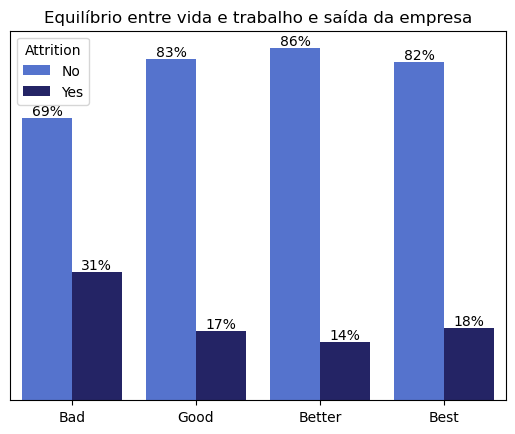

In [23]:
ax = sns.barplot(data=normalized_count, x='WorkLifeBalance2', y='Proportion', hue='Attrition', palette = colors, 
                 order = ['Bad', 'Good', 'Better', 'Best'])

for p in ax.patches:
    count = p.get_height()
    ax.annotate(str(int(round((count*100), 0))) + "%", xy=(p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                va='bottom')
    
plt.title('Equilíbrio entre vida e trabalho e saída da empresa')
plt.ylabel(None)
plt.xlabel(None)
plt.yticks([]);

Vê-se que colaboradores com um mau equilíbrio entre vida e trabalho saem com mais frequência da empresa - 31% - enquanto os números para as outras categorias fica entre 14% e 18%. Para esse caso omitiremos a demonstração estatística, já que a diferença entre as proporções são significativas.

## A distância do trabalho afeta a retenção dos colaboradores da empresa?

In [24]:
data['DistanceFromHome'].value_counts().sort_index()

1     208
2     211
3      84
4      64
5      65
6      59
7      84
8      80
9      85
10     86
11     29
12     20
13     19
14     21
15     26
16     32
17     20
18     26
19     22
20     25
21     18
22     19
23     27
24     28
25     25
26     25
27     12
28     23
29     27
Name: DistanceFromHome, dtype: int64

In [25]:
# Mapeando as distâncias para 4 categorias
data['DistanceFromHome2'] = np.where(data['DistanceFromHome'] <= 5, "Muito perto", 
                                     np.where(data['DistanceFromHome'] <= 10, "Perto",
                                     np.where(data['DistanceFromHome'] <= 20, "Longe", "Muito Longe")))
data['DistanceFromHome2']

0       Muito perto
1             Perto
2       Muito perto
3       Muito perto
4       Muito perto
           ...     
1465    Muito Longe
1466          Perto
1467    Muito perto
1468    Muito perto
1469          Perto
Name: DistanceFromHome2, Length: 1470, dtype: object

In [26]:
data['DistanceFromHome2'].value_counts()

Muito perto    632
Perto          394
Longe          240
Muito Longe    204
Name: DistanceFromHome2, dtype: int64

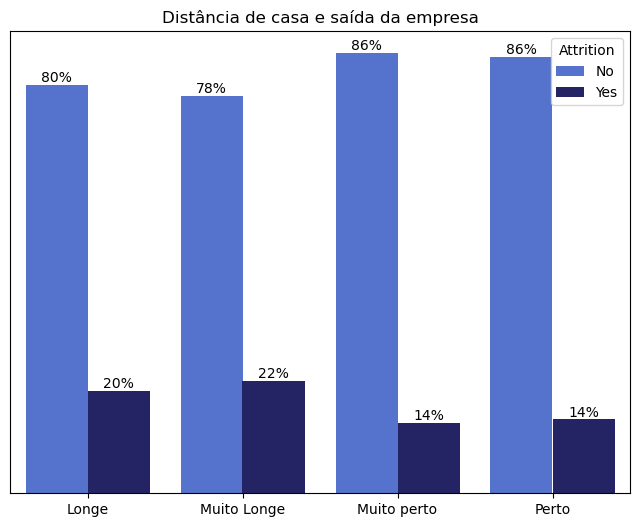

In [27]:
normalized_count = data.groupby('DistanceFromHome2')['Attrition'].value_counts(normalize = True).rename('Proportion').reset_index()
normalized_count


plt.figure(figsize=(8, 6))
ax = sns.barplot(data=normalized_count, x='DistanceFromHome2', y='Proportion', hue='Attrition', palette = colors)

for p in ax.patches:
    count = p.get_height()
    ax.annotate(str(int(round((count*100), 0))) + "%", xy=(p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                va='bottom')
    
plt.title('Distância de casa e saída da empresa')
plt.ylabel(None)
plt.xlabel(None)
plt.yticks([]);

Colaboradores que trabalham longe ou muito longe do trabalho saem de 6 a 8% mais frequentemente da empresa do que aqueles que moram perto ou muito perto.

## Capacitar os colaboradores influencia na retenção da empresa?

In [28]:
# Criando nova variável categórica relacionada ao número de treinamentos
condicoes = [data['TrainingTimesLastYear'] < 2, data['TrainingTimesLastYear'] < 4, data['TrainingTimesLastYear'] >= 4]
valores = ["Abaixo da média", "Na média", "Acima de média"]
data['NumeroTreinamentos'] = np.select(condicoes, valores)

data['NumeroTreinamentos'].value_counts()

Na média           1038
Acima de média      307
Abaixo da média     125
Name: NumeroTreinamentos, dtype: int64

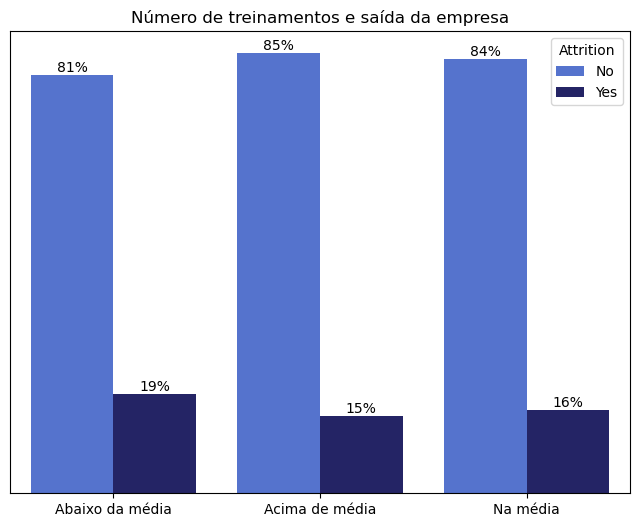

In [29]:
normalized_count = data.groupby('NumeroTreinamentos')['Attrition'].value_counts(normalize = True).rename('Proportion').reset_index()
normalized_count


plt.figure(figsize=(8, 6))
ax = sns.barplot(data=normalized_count, x='NumeroTreinamentos', y='Proportion', hue='Attrition', palette = colors)

for p in ax.patches:
    count = p.get_height()
    ax.annotate(str(int(round((count*100), 0))) + "%", xy=(p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                va='bottom')
    
plt.title('Número de treinamentos e saída da empresa')
plt.ylabel(None)
plt.xlabel(None)
plt.yticks([]);

Vê-se que neste caso a diferença é de apenas 3% entre a saída de colaboradores que receberam poucos treinamentos e aqueles que receberam na média ou acima da média. Vamos validar estatisticamente se essa diferença é significativa.

In [30]:
counts = data.groupby('NumeroTreinamentos')['Attrition'].value_counts().rename('Count').reset_index()
counts

,NumeroTreinamentos,Attrition,Count
0,Abaixo da média,No,101
1,Abaixo da média,Yes,24
2,Acima de média,No,261
3,Acima de média,Yes,46
4,Na média,No,871
5,Na média,Yes,167


### Definição das hipóteses - Teste-z para proporções

H0 (Hipótese Nula): Não há diferença significativa entre as proporções comparadas. A proporção de colaboradores que saem da empresa é a mesma, independentemente do número de treinamentos.

H1 (Hipótese Alternativa): Há diferença significativa entre as proporções comparadas. A proporção de colaboradores que saem da empresa difere significativamente entre aqueles que recebem mais treinamentos e os que recebem mais treinamentos.

Nível de significância: 5%

In [31]:
# Teste-z para proporções entre número de treinamentos abaixo da média e na média
count = [24, 167]     # Número de pessoas que saíram da empresa para cada categoria
nobs = [24+101, 167+871]            # Total da categoria
stat, pval = proportions_ztest(count, nobs, alternative = 'larger')

# Imprime a estatística do teste e o p-valor
print("Estatística do teste:", stat)
print("P-valor:", pval)

Estatística do teste: 0.887043887199977
P-valor: 0.18752763630139357


In [32]:
# Teste-z para proporções entre número de treinamentos abaixo da média e acima da média
count = [24, 46]     # Número de pessoas que saíram da empresa para cada categoria
nobs = [24+101, 46+261]            # Total da categoria
stat, pval = proportions_ztest(count, nobs, alternative = 'larger')

# Imprime a estatística do teste e o p-valor
print("Estatística do teste:", stat)
print("P-valor:", pval)

Estatística do teste: 1.0784323106229923
P-valor: 0.1404204371275541


Neste caso, vê-se que ambos os p-valores são maiores que 5%, logo não devemos rejeitar a hipótese nula. A diferença entre as proporções não é estatisticamente significativa.

**Conclusão: Não existe uma diferença significativa na retenção de colaboradores que recebem mais treinamentos.**

## Modelos Machine Learning para previsão de Turnover

Vamos criar um modelo de Machine Learning para prever a saída de colaboradores da empresa baseado nas características contidas no dataset. Além disso, também é possível fazer algumas inferências através de atributos do modelo, como o _feature importances_.

Como criamos algumas colunas no dataset durante o projeto, vamos importá-lo de novo.

In [33]:
# Importando o dataset novamente
df = pd.read_csv('HR_Analytics.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [34]:
# Divisão dos dados em variável target (y) e variáveis preditoras (X)
y = df['Attrition']
df.drop(columns = 'Attrition', inplace = True)
X = df

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100, stratify = y)

Como o modelo Random Forest não pode receber variáveis em formato de texto, vamos codificá-las em números.

In [35]:
# Cria lista de todas as colunas de tipo texto no dataset
columns_to_encode = [col for col in df.columns if X[col].dtype == "object"]
columns_to_encode

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [36]:
# Cria uma instância do encoder
label_encoder = LabelEncoder()

# Loop através das colunas para codificá-las
for column in columns_to_encode:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

# Encoding da variável target
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [37]:
# Instância o modelo
rfc = RandomForestClassifier()

# Treinamento do modelo
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
# Criar a matriz de confusão
def matriz_confusao(classificador, X_test, y_test):
    
    cm = confusion_matrix(y_test, classificador.predict(X_test))
    nomes = ['Verdadeiro Neg.','Falso Pos.','Falso Neg.','Verdadeiro Pos.']
    counts = [value for value in cm.flatten()]
    porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (16, 9))
    sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
    plt.show();

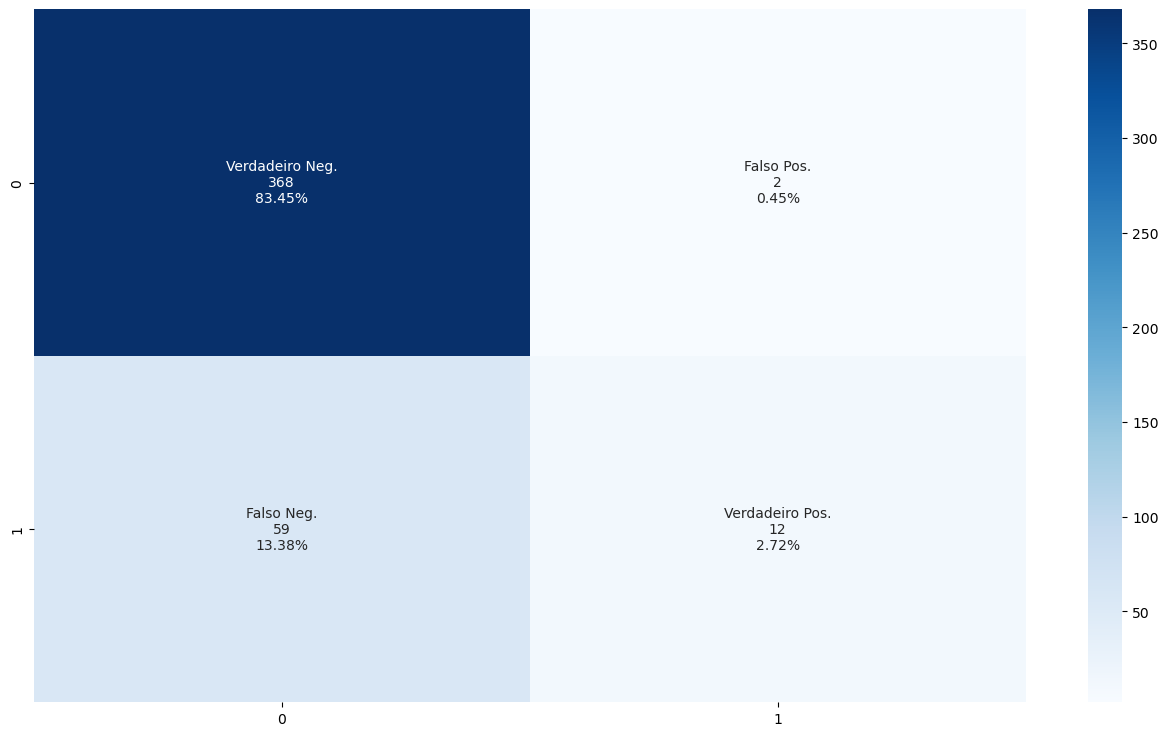

In [39]:
matriz_confusao(rfc, X_test, y_test)

## Entendendo a matriz de confusão

Para nosso encoding, temos que 0 (Negativo) correspondem aos colaboradores que não saíram da empresa, enquanto 1 (Positivo) correspondem aos que saíram.

* **Verdadeiro Negativos** são pessoas que o modelo previu corretamente que não saíram da empresa.
* **Verdadeiro Positivos** são pessoas que o modelo previu corretamente que saíram da empresa.
* **Falsos Positivos** são pessoas que o modelo previu que saíram da empresa, mas o modelo errou.
* **Falsos Negativos** são pessoas que o modelo previu que não saíram da empresa, mas o modelo errou.

Para nosso problema de negócio, estamos interessados na quantidade de **Verdadeiros Positivos** e **Falsos Positivos**, pois, se prevermos que um colaborador irá deixar a empresa, podemos utilizar de estratégias de retenção, como diminuir a frequência de viagens a trabalho do colaborador, permitir a flexibilidade de trabalho remoto para aqueles que moram longe, o que também melhoraria a percepção de equilíbrio entre vida e trabalho do colaborador. 

Prever **Verdadeiros Positivos** nos permite evitar que aquele colaborador saia da empresa.
Já prever **Falsos Positivos** implicaria num maior custo para a empresa, aplicando estratégias de retenção quando estas não são necessárias.

Para o modelo Random Forest Classifier, temos a previsão de 8 Verdadeiros Positivos e 2 Falsos Positivos no conjunto de teste.

De acordo com a [Reachr](https://blog.reachr.com.br/recrutamento-e-selecao-quanto-custa-para-empresa/), um processo seletivo custa em média 52,5 horas e BRL 2.404,63 para a empresa. Vamos estimar que manter esses talentos custaria à empresa 20 horas de trabalho e mais BRL 1000,00. Logo, temos:

In [40]:
VP = 10
FP = 4

custo_ps = 2404.63
custo_retencao = 1000

tempo_ps = 52.5
tempo_retencao = 20

saving_financeiro = custo_ps*VP - custo_retencao*(VP+FP) 
saving_tempo = tempo_ps*VP - tempo_retencao*(VP+FP)

print(f"A empresa economizaria BRL {saving_financeiro: .2f} e {saving_tempo} horas de trabalho com o modelo.")

A empresa economizaria BRL  10046.30 e 245.0 horas de trabalho com o modelo.


## Testando o modelo XGBoostClassifier

O modelo XGBoostClassifier possui um parâmetro que permite ajustar o balanceamento entre as classes positiva e negativa. Como no nosso problema existem muito mais registros da classe negativa (não saíram da empresa) do que da classe positiva (saíram da empresa), esse parâmetro pode ajudar a conseguir uma melhor performance.

In [41]:
np.bincount(y_train)

array([863, 166], dtype=int64)

In [42]:
# Instancia o modelo
xgb_classifier = XGBClassifier(scale_pos_weight = 833/166)

# Train the XGBoost Classifier
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

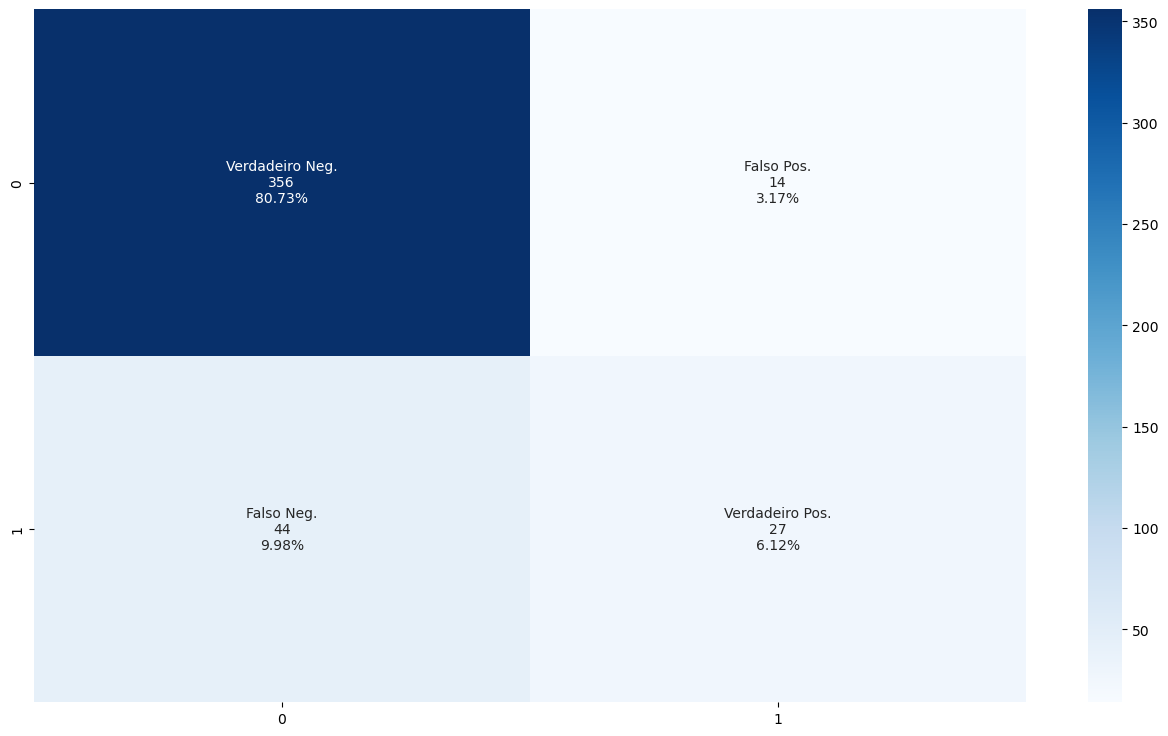

In [43]:
matriz_confusao(xgb_classifier, X_test, y_test)

In [44]:
VP = 27
FP = 14

custo_ps = 2404.63
custo_retencao = 1000

tempo_ps = 52.5
tempo_retencao = 20

saving_financeiro = custo_ps*VP - custo_retencao*(VP+FP) 
saving_tempo = tempo_ps*VP - tempo_retencao*(VP+FP)

print(f"A empresa economizaria BRL {saving_financeiro: .2f} e {saving_tempo} horas de trabalho com o modelo.")

A empresa economizaria BRL  23925.01 e 597.5 horas de trabalho com o modelo.


Vemos que o XGBoost teve um desempenho melhor que o modelo RandomForest.

Além de previsões com o modelo, também é possível extrair insights de inferências, utilizando por exemplo o atributo _feature importances_.

In [45]:
def feature_importances_plot(model):
    # Extrai a importância
    feature_importance = model.feature_importances_
    feature_names = model.feature_names_in_

    # Dicionário de importâncias
    importance_dict = {feature_names[i]: feature_importance[i] for i in range(len(feature_names))}

    # Constrói um DataFrame a partir do dicionário
    df_imp = pd.DataFrame(importance_dict, index=['Feature Importance'])

    # Transpõe o Dataframe
    df_imp = df_imp.T

    plot = df_imp.sort_values(ascending=False, by=['Feature Importance'])

    plt.figure(figsize=(20,12))
    sns.barplot(data = plot, x=plot.index, y = 'Feature Importance', color = colors[1])
    plt.title(f"Importância das Features para o Algoritmo {type(model).__name__}")
    plt.xticks(rotation = 90);

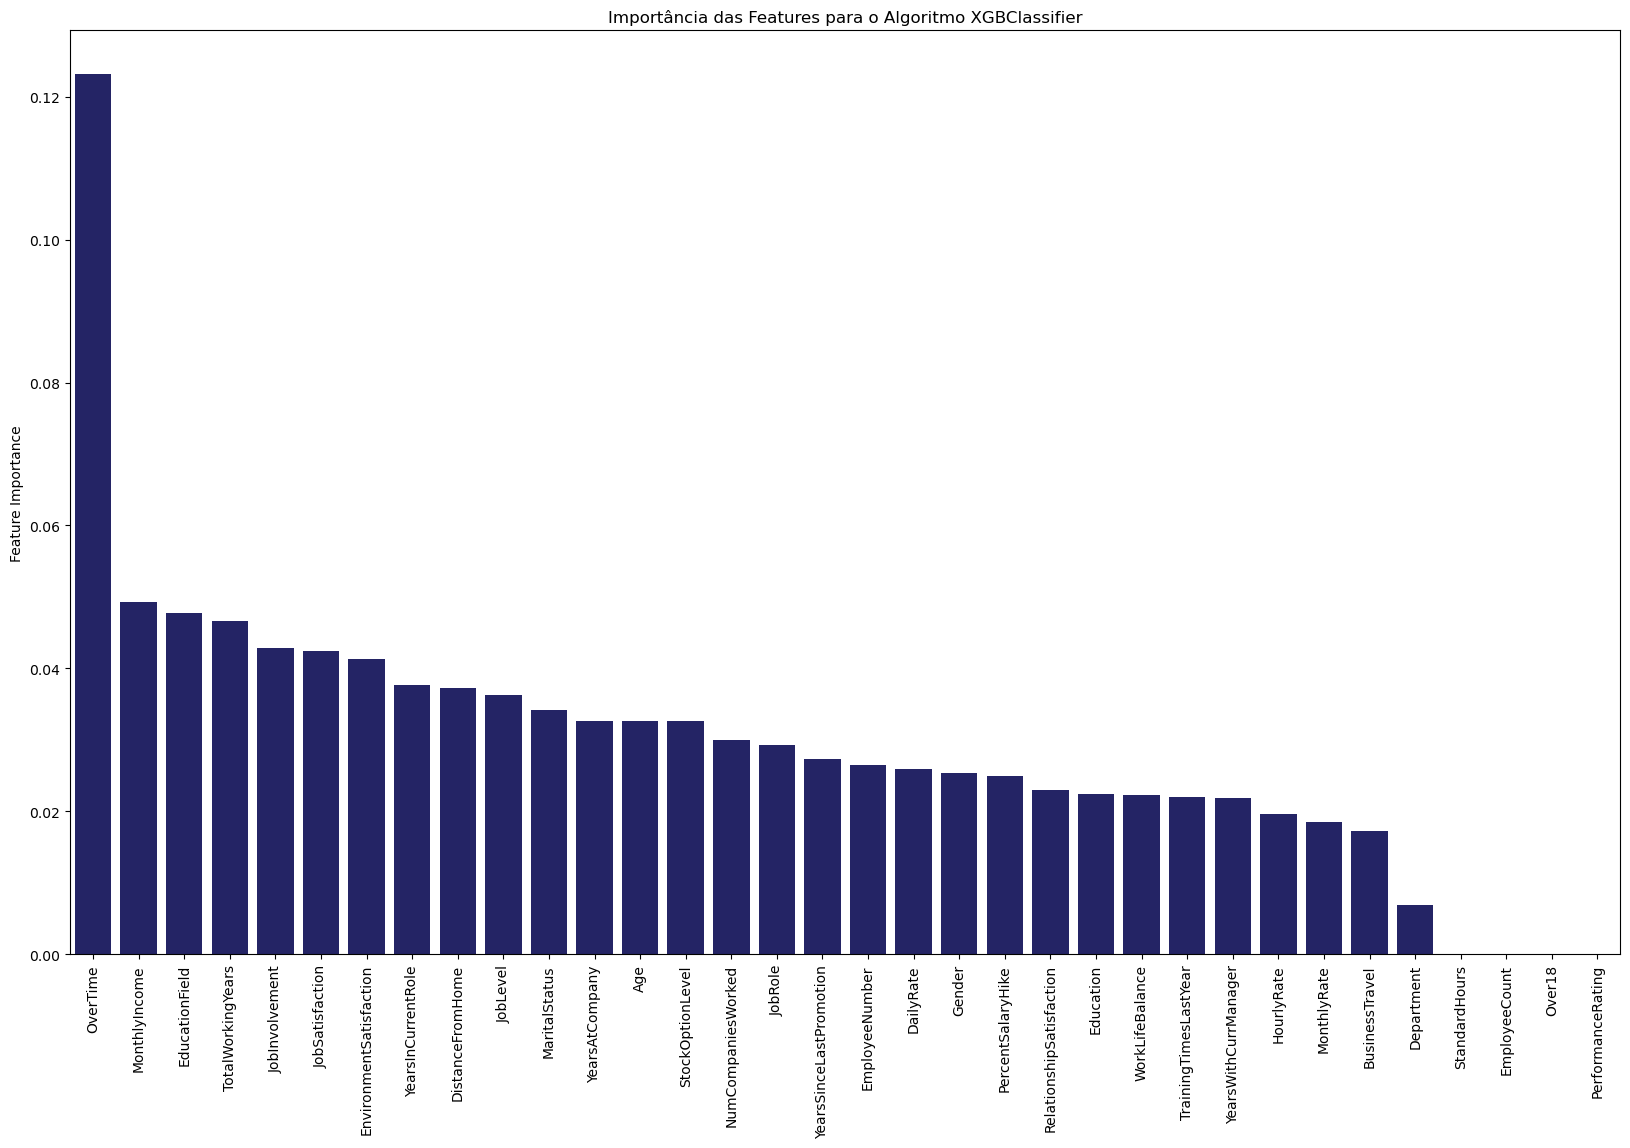

In [46]:
feature_importances_plot(xgb_classifier)

Dessa forma, vemos que as variáveis mais importantes para previsão do modelo são:

* Overtime - Se o colaborador faz horas extras.
* Monthly Income - Renda mensal do colaborador.
* Education Field - Área de estudo do colaborador

Isso pode fornecer insights sobre as melhores estratégias de retenção a serem aplicadas.

# Conclusões

Com essa análise, pudemos retirar alguns insights importantes:

* A maior parte dos colaboradores têm entre 30 e 40 anos;
* O departamento de Research & Development é o que possui a maior quantidade de colaboradores;
* A maior parte dos colaboradores têm nível de Graduação e Mestrado, e vêm das áreas de Ciências da Natureza e Medicina;
* A maioria dos colaboradores recebe de 2 a 3 treinamentos por ano;
* Colaboradores que viajam frequentemente a trabalho saem mais da empresa.
* Colaboradores que moram longe ou muito longe do trabalho saem de 6 a 8% mais frequentemente da empresa do que aqueles que moram perto ou muito perto.
* Não existe uma diferença significativa na retenção de colaboradores que recebem mais treinamentos.
* Utilizando um modelo preditivo para a saída de colaboradores, a empresa poderia economizar BRL 23925.01 e 597.5 horas de trabalho com a saída de colaboradores ao utilizar de estratégias de retenção..

É importante ainda notar que há muito espaço para melhorar o modelo preditivo. Nessa análise não foram feitas várias etapas do processamento de dados, como normalização e padronização, eliminação de outliers, seleção e engenharia de atributos e muitas outras estratégias que podem melhorar a performance do modelo. 